In [10]:
import tensorflow as tf
import numpy as np



# Data.
max_val = 26
mod = 26

K = np.random.randint(0, 27, size=(250_000,)).reshape(-1, 1)
I = np.random.randint(0, max_val, size=(250_000,)).reshape(-1, 1)
print(I.shape)
print(K.shape)
X = np.hstack((I,K))
Y = (K + I) % 26

# validation Data.
Kv = np.random.randint(0, 27, size=(10_000,)).reshape(-1, 1)
Iv = np.random.randint(0, max_val, size=(10_000,)).reshape(-1, 1)
Xv = np.hstack((Iv,Kv))
Yv = (Kv + Iv) % 26

# Model.
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1000, 'relu', input_shape=(2,)),
    tf.keras.layers.Dense(26, 'softmax'),
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train.
history = model.fit(X, Y, batch_size=100, epochs=120, validation_data=(Xv, Yv))

(250000, 1)
(250000, 1)
Epoch 1/120
2500/2500 [==============================] - 4s 1ms/step - loss: 2.9150 - accuracy: 0.1090 - val_loss: 2.5584 - val_accuracy: 0.2118
Epoch 2/120
2500/2500 [==============================] - 3s 1ms/step - loss: 2.1632 - accuracy: 0.3363 - val_loss: 1.8310 - val_accuracy: 0.4368
Epoch 3/120
2500/2500 [==============================] - 3s 1ms/step - loss: 1.5926 - accuracy: 0.5699 - val_loss: 1.3952 - val_accuracy: 0.6617
Epoch 4/120
2500/2500 [==============================] - 4s 1ms/step - loss: 1.2533 - accuracy: 0.7314 - val_loss: 1.1151 - val_accuracy: 0.8329
Epoch 5/120
2500/2500 [==============================] - 4s 2ms/step - loss: 1.0207 - accuracy: 0.8205 - val_loss: 0.9230 - val_accuracy: 0.8440
Epoch 6/120
2500/2500 [==============================] - 4s 1ms/step - loss: 0.8476 - accuracy: 0.8655 - val_loss: 0.7693 - val_accuracy: 0.8852
Epoch 7/120
2500/2500 [==============================] - 4s 1ms/step - loss: 0.7147 - accuracy: 0.8876 - v

In [11]:
number = 5
key = 6
input_array = np.array([[number, key]])

pred = model.predict(input_array)


pred.argmax(axis=1)
    


1/1 [==============================] - 0s 42ms/step


array([11], dtype=int64)

In [12]:
(5 + 5) % 26 

10

In [13]:
# Test Data.
Kt = np.random.randint(0, 27, size=(10_000,)).reshape(-1, 1)
It = np.random.randint(0, max_val, size=(10_000,)).reshape(-1, 1)
Xt = np.hstack((It,Kt))
Yt = (Kt + It) % 26

Y_preds = model.predict(Xt)

Y_preds = Y_preds.argmax(axis=1)

313/313 [==============================] - 0s 696us/step


In [14]:
from sklearn.metrics import classification_report

print(classification_report(Yt, Y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       397
           1       1.00      1.00      1.00       376
           2       1.00      1.00      1.00       421
           3       1.00      1.00      1.00       389
           4       1.00      1.00      1.00       412
           5       1.00      1.00      1.00       419
           6       1.00      1.00      1.00       340
           7       1.00      1.00      1.00       365
           8       1.00      1.00      1.00       379
           9       1.00      1.00      1.00       410
          10       1.00      1.00      1.00       385
          11       1.00      1.00      1.00       391
          12       1.00      1.00      1.00       408
          13       1.00      1.00      1.00       370
          14       1.00      1.00      1.00       353
          15       1.00      1.00      1.00       408
          16       1.00      1.00      1.00       370
          17       1.00    

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']
acc = history.history['accuracy']
loss = history.history['loss']
epochs = list(range(120))

Text(0.5, 1.0, 'Loss vs Epoch')

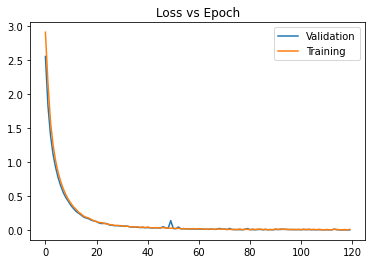

In [21]:
sns.lineplot(x=epochs, y=val_loss, label='Validation')
sns.lineplot(x=epochs, y=loss,label='Training')
plt.legend()
plt.title('Loss vs Epoch')

Text(0.5, 1.0, 'Accuracy vs Epoch')

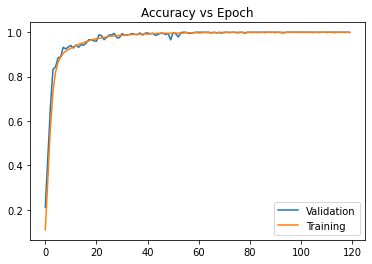

In [22]:
sns.lineplot(x=epochs, y=val_acc, label='Validation')
sns.lineplot(x=epochs, y=acc, label='Training')
plt.legend()
plt.title('Accuracy vs Epoch')